# update code in the qzv_filegrab.py
this interactive notebook. this is just for testing/playing with the code\
\
import sys\
sys.path.append('/home/kwchan/python_scripts')\
from qzv_filegrab import qzv_filegrabber\

found: plot.png


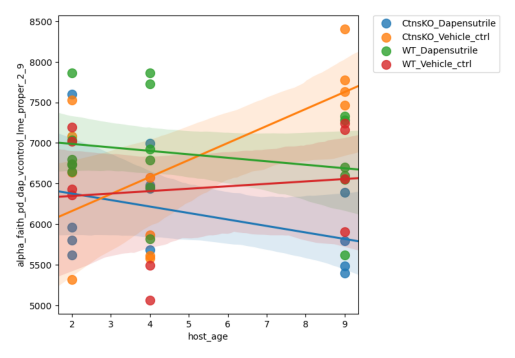

In [80]:
import zipfile
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def qzv_filegrabber(qzv_filepath_str, nested_raw_data_file_str='data/raw-data.tsv', save=False):

    """
    Extracts a specific file from a .qzv archive and optionally saves it to the parent directory.
    
    Parameters:
    qzv_filepath_str (str): Path to the .qzv file.
    nested_raw_data_file_str (str): Relative path to the file within the .qzv archive. 
                                    Can be: 'raw-data.tsv' (for alpha/beta diversity),  
                                    'kruskal-wallis-pairwise-volume.csv' (for alpha diversity), 
                                    'permanova-pairwise.csv' (for beta diversity),
                                    'plot.png' (for lme), 'model_results.tsv' (for lme), etc..
                                    
                                    To find the name of the file type, you can:
                                    - go to view.qiime2.org drag and drop the file, and then inspect element 
                                    - unzip file in terminal to browse
                                    
    save (bool): If True, saves the extracted file to the parent directory of the .qzv file. Default is True.
    
    Returns:
    str: Path to the saved file if `save` is True, otherwise None.
    
    Example usage:
    raw_data_fp = qzv_filegrabber('/path/to/file.qzv', nested_raw_data_file_str='raw-data.tsv', save=True)
    qzv_filegrabber('/path/to/file.qzv', nested_raw_data_file_str='plot.png', save=False)
    """
    
    # Path to your .qzv file
    zip_file_path = qzv_filepath_str
    
    # Directory to extract the specific file
    unzipped_qzv_dir = f'{qzv_filepath_str}.unzipped'
    
    # Ensure the directory exists
    os.makedirs(unzipped_qzv_dir, exist_ok=True)
    
    # Initialize the variable to store the specific file path
    specific_file = None
    
    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # List all the files in the zip archive
        all_files = zip_ref.namelist()
        
        # Search for the specific file
        for file in all_files:
            if file.endswith(nested_raw_data_file_str):
                specific_file = file
                break
    
        # Check if the specific file was found and extract it
        if specific_file:
            zip_ref.extract(specific_file, unzipped_qzv_dir)
            raw_data_fp = os.path.join(unzipped_qzv_dir, specific_file)
            # print(f"Extracted {specific_file} to {raw_data_fp}")
            
            qzv_label = os.path.splitext(os.path.basename(qzv_filepath_str))[0]
            output_fp = os.path.join(os.path.dirname(qzv_filepath_str), f'{qzv_label}-{os.path.basename(nested_raw_data_file_str)}')
            
            # Copy the file to the output file path
            print(f'found: {os.path.basename(nested_raw_data_file_str)}') # in {raw_data_fp}')
            
            
                    

            
            if nested_raw_data_file_str.endswith('.tsv'):
                df = pd.read_csv(raw_data_fp, sep='\t' , dtype=str)
                print(df.head(2))
                print('to use dataframe, df = qzv_filegrabber()')
               
                if save==True:
                    shutil.copy(raw_data_fp, output_fp) #moves file from zipped file to qzv parent directory   
                    print(f'saved {os.path.basename(nested_raw_data_file_str)} to', output_fp)
                        # return output_fp
                shutil.rmtree(unzipped_qzv_dir) #removes unzipped directory
                return df
            
            elif nested_raw_data_file_str.endswith('.png'):
                img = mpimg.imread(raw_data_fp)
                plt.imshow(img)
                plt.axis('off')
                plt.show()

                if save==True:
                    shutil.copy(raw_data_fp, output_fp) #moves file from zipped file to qzv parent directory   
                    print(f'saved {os.path.basename(nested_raw_data_file_str)} to', output_fp)
                    # return output_fp
                shutil.rmtree(unzipped_qzv_dir) #removes unzipped directory

            
            else:
                shutil.rmtree(unzipped_qzv_dir) #removes unzipped directory
                print('file not saved, use save=True' ,'output_fp = qzv_filegrabber(parent/file/path.qzv, nested_raw_data_file_str, save=False)')
                return None
            
        else:
            print(f"{nested_raw_data_file_str} not found in the zip archive")
            return None

                    # Remove the unzipped directory
            

# Example usage

# import sys
# sys.path.append('/home/kwchan/python_scripts')
# from qzv_filegrab import qzv_filegrabber 


qzv_filepath_str = '/home/kwchan/projects/2024-4-1_ctns_study/fecal/fecal_scrubbed_lme_dap_vcontrol_faith_pd_2_9.qzv'
nested_raw_data_file_str='plot.png' #or model_results.tsv

# raw_data_df = 

df = qzv_filegrabber(qzv_filepath_str, nested_raw_data_file_str='model_results.tsv', save=False)
# df
# if raw_data_df is not None:
#     print(raw_data_df.head(2))

#updating file to test git

   